COMPREHENSIVE INDIAN STATES CLUSTERING ANALYSIS WITH GEOGRAPHIC MAPPING

1. ADVANCED DATA PREPROCESSING
--------------------------------------------------
Initial Data Overview:
Dataset shape: (33, 11)
States/UTs: 33
Features: ['GSDP_Per_Capita', 'Literacy_Rate', 'Infant_Mortality_Rate', 'Life_Expectancy', 'Poverty_Rate', 'Industry_GSVA', 'Services_GSVA', 'Cropping_Intensity', 'Fertiliser_Consumption', 'Forest_Cover', 'Sex_Ratio']

Missing values analysis:
  Literacy_Rate: 1 missing values (3.0%)
  Life_Expectancy: 12 missing values (36.4%)
  Poverty_Rate: 1 missing values (3.0%)
  Cropping_Intensity: 3 missing values (9.1%)
  Fertiliser_Consumption: 2 missing values (6.1%)
  Sex_Ratio: 1 missing values (3.0%)
  Imputed 1 values in 'Literacy_Rate' with median: 77.15
  Imputed 0 values in 'Infant_Mortality_Rate' with median: 39.50
  Imputed 12 values in 'Life_Expectancy' with median: 64.55
  Imputed 1 values in 'Poverty_Rate' with median: 14.50
  Imputed 3 values in 'Cropping_Intensity'

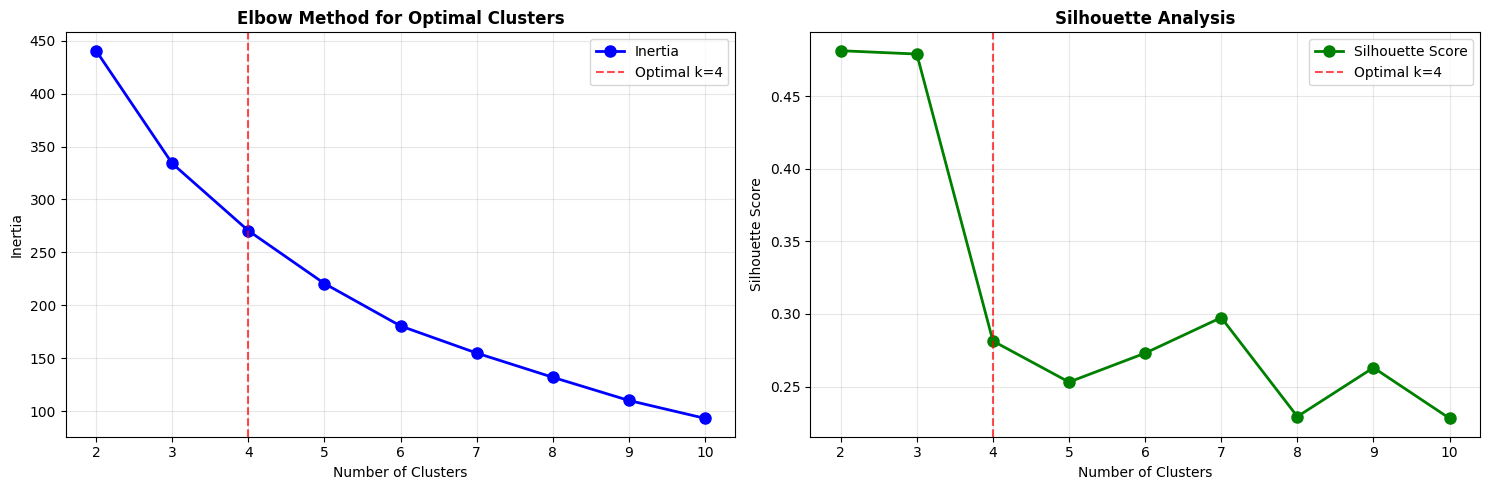



3. ADVANCED CLUSTERING ALGORITHMS
--------------------------------------------------
Running K-Means clustering...
Running Hierarchical clustering...
Running Gaussian Mixture Models...
Running DBSCAN clustering...


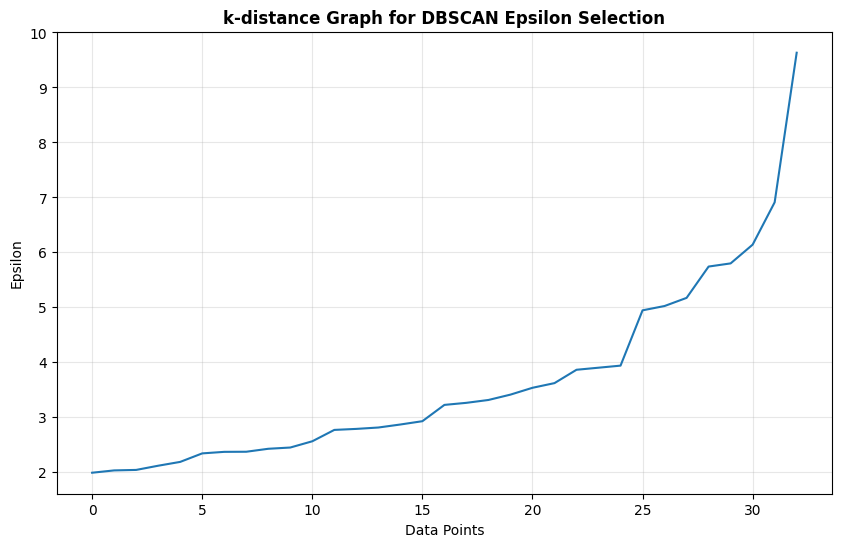

All clustering algorithms completed successfully!


4. COMPREHENSIVE CLUSTER VALIDATION
--------------------------------------------------

--- COMPREHENSIVE CLUSTER VALIDATION RESULTS ---
              Silhouette  Davies-Bouldin  Calinski-Harabasz  Clusters  \
Algorithm                                                               
K-Means           0.2751          1.0754            16.6854         4   
Hierarchical      0.2838          0.8232            16.3839         4   
GMM               0.1835          1.3744            13.2322         4   
DBSCAN            0.0435          2.5702             2.6412         3   

              Noise_Points  
Algorithm                   
K-Means                  0  
Hierarchical             0  
GMM                      0  
DBSCAN                  12  

--- PERFORMANCE RANKINGS ---
🥇 Best Silhouette Score: Hierarchical (0.2838)
🥇 Best Davies-Bouldin Index: Hierarchical (0.8232)
🥇 Best Calinski-Harabasz Index: K-Means (16.6854)

🏆 BEST OVERALL ALGO

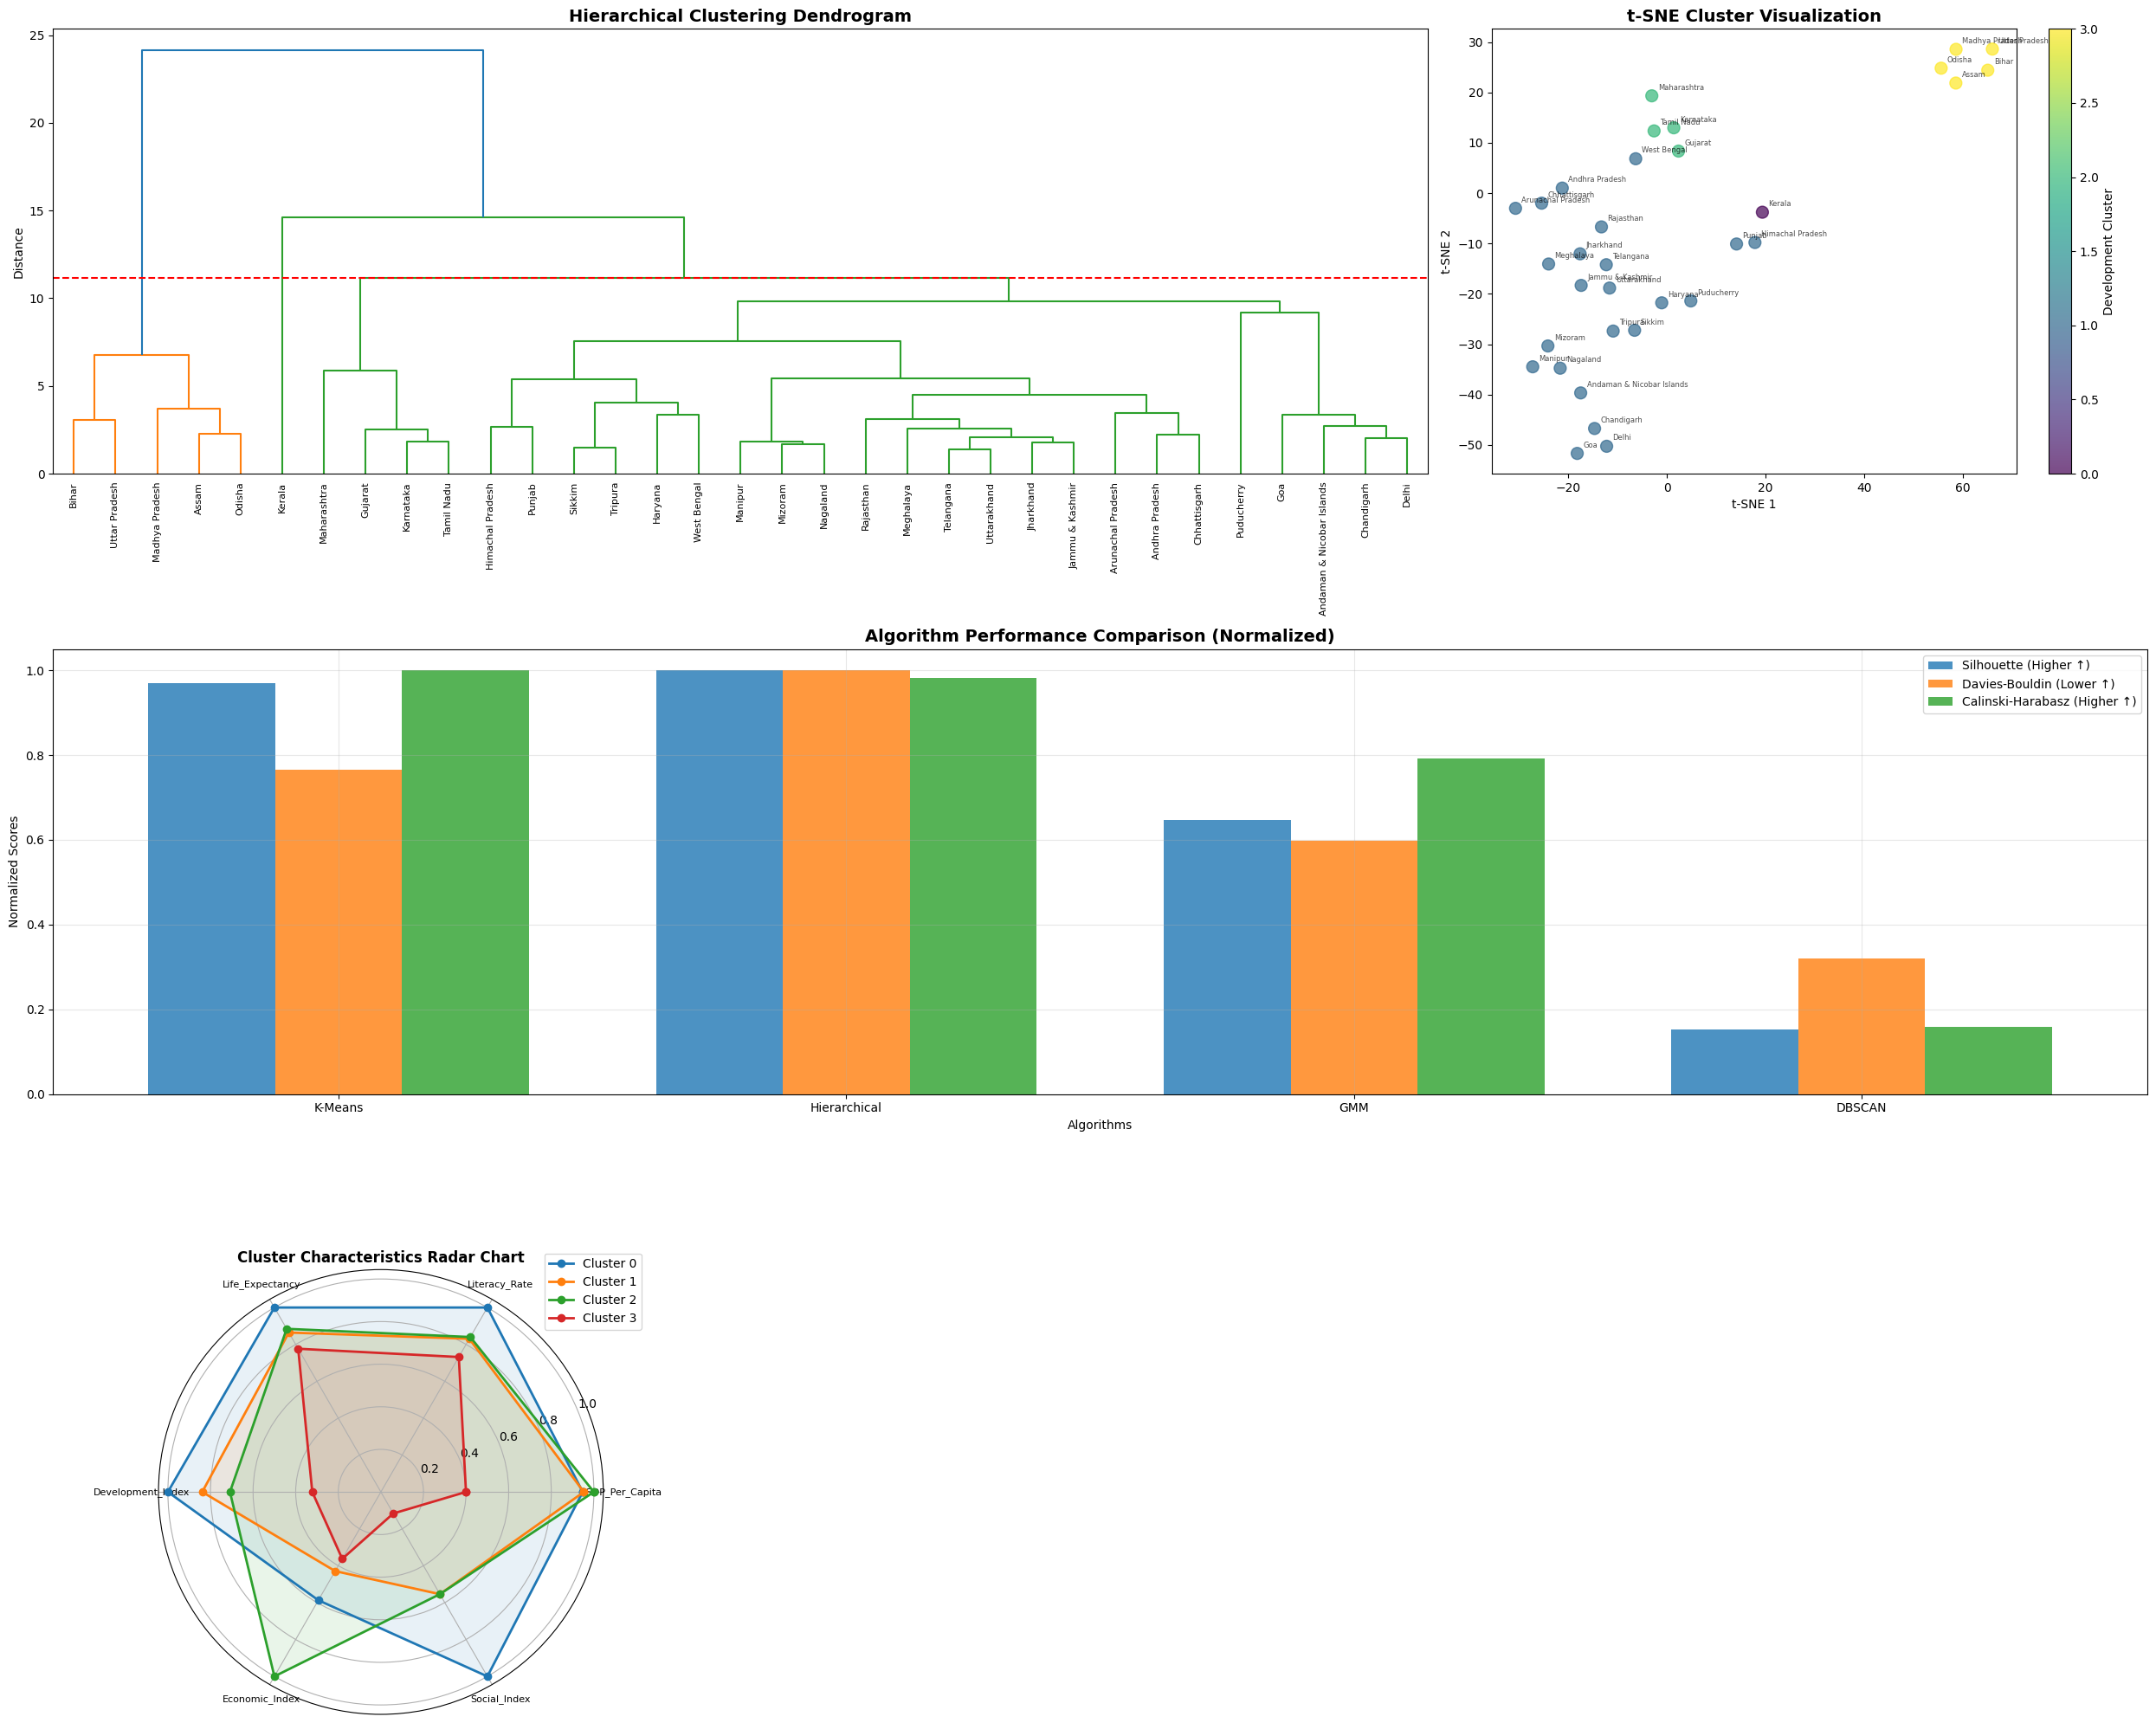



7. GEOGRAPHIC MAPPING OF DEVELOPMENT CLUSTERS
--------------------------------------------------
States in shapefile: ['Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattishgarh', 'Daman And Diu And Dadra And Nagar Haveli', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamilnadu', 'Telengana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']


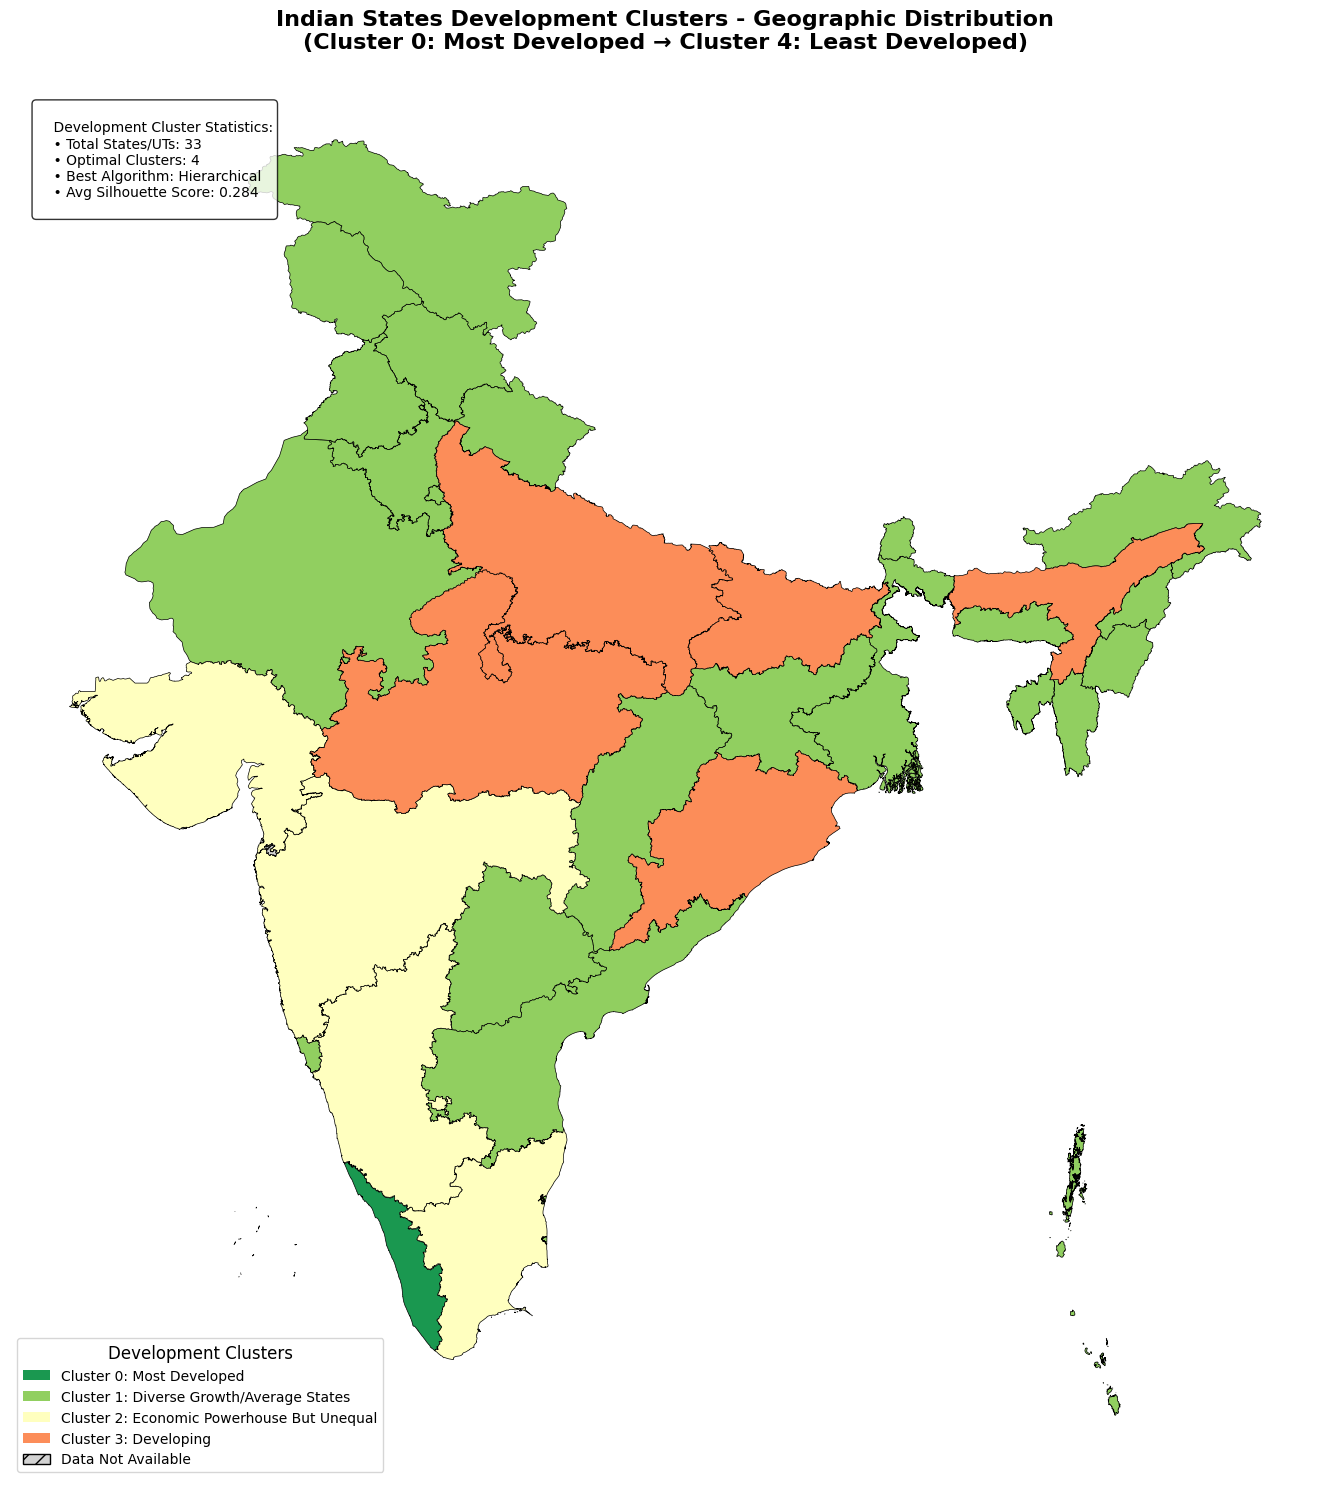

✅ Geographic mapping completed successfully!


8. POLICY INSIGHTS AND RECOMMENDATIONS
--------------------------------------------------

🔍 KEY INSIGHTS BY DEVELOPMENT CLUSTER:

📍 MOST DEVELOPED STATES (Cluster 0):
   • Economic: GSDP per capita ₹46,865 (Avg: ₹43,252)
   • Social: Literacy 94.0% | Infant Mortality 12.0
   • Poverty: Rate 41.0% (Avg: 80.6%)
   💡 Policy Focus: Maintain leadership through innovation and high-tech industries

📍 Diverse Growth/Average States STATES (Cluster 1):
   • Economic: GSDP per capita ₹47,125 (Avg: ₹43,252)
   • Social: Literacy 78.1% | Infant Mortality 37.0
   • Poverty: Rate 24.8% (Avg: 80.6%)
   💡 Policy Focus: Bridge gaps in social infrastructure and regional development

📍 Economic Powerhouse But Unequal STATES (Cluster 2):
   • Economic: GSDP per capita ₹49,450 (Avg: ₹43,252)
   • Social: Literacy 79.0% | Infant Mortality 37.0
   • Poverty: Rate 132.7% (Avg: 80.6%)
   💡 Policy Focus: Boost manufacturing and improve healthcare access

📍 DEVELOPI

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import NearestNeighbors
import geopandas as gpd
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

# =============================================================================
# ENHANCED DATA PREPROCESSING AND FEATURE ENGINEERING
# =============================================================================

print("=" * 80)
print("COMPREHENSIVE INDIAN STATES CLUSTERING ANALYSIS WITH GEOGRAPHIC MAPPING")
print("=" * 80)

# Load and prepare data
df = pd.read_csv('/content/indian_states_data_final.csv', index_col='State')

print("\n1. ADVANCED DATA PREPROCESSING")
print("-" * 50)

# Detailed data quality report
print("Initial Data Overview:")
print(f"Dataset shape: {df.shape}")
print(f"States/UTs: {len(df)}")
print(f"Features: {list(df.columns)}")

# Handle missing values with advanced imputation
missing_report = df.isnull().sum()
print(f"\nMissing values analysis:")
for col, missing_count in missing_report.items():
    if missing_count > 0:
        print(f"  {col}: {missing_count} missing values ({missing_count/len(df)*100:.1f}%)")

# Convert to numeric and impute with median
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"  Imputed {missing_report[col]} values in '{col}' with median: {median_val:.2f}")

# Feature Engineering: Create composite development indices
print("\nFeature Engineering:")
df['Development_Index'] = (
    df['GSDP_Per_Capita'] / df['GSDP_Per_Capita'].max() * 0.3 +
    df['Literacy_Rate'] / 100 * 0.2 +
    (100 - df['Poverty_Rate'] / df['Poverty_Rate'].max() * 100) * 0.2 +
    (100 - df['Infant_Mortality_Rate'] / df['Infant_Mortality_Rate'].max() * 100) * 0.15 +
    df['Life_Expectancy'] / df['Life_Expectancy'].max() * 0.15
)

df['Economic_Index'] = (
    df['GSDP_Per_Capita'] / df['GSDP_Per_Capita'].max() * 0.4 +
    df['Industry_GSVA'] / df['Industry_GSVA'].max() * 0.3 +
    df['Services_GSVA'] / df['Services_GSVA'].max() * 0.3
)

df['Social_Index'] = (
    df['Literacy_Rate'] / 100 * 0.3 +
    (100 - df['Infant_Mortality_Rate'] / df['Infant_Mortality_Rate'].max() * 100) * 0.3 +
    df['Life_Expectancy'] / df['Life_Expectancy'].max() * 0.2 +
    df['Sex_Ratio'] / df['Sex_Ratio'].max() * 0.2
)

print("  Created composite indices: Development_Index, Economic_Index, Social_Index")

# Select features for clustering (including engineered features)
feature_columns = [
    'GSDP_Per_Capita', 'Literacy_Rate', 'Infant_Mortality_Rate',
    'Life_Expectancy', 'Poverty_Rate', 'Industry_GSVA', 'Services_GSVA',
    'Cropping_Intensity', 'Fertiliser_Consumption', 'Forest_Cover', 'Sex_Ratio',
    'Development_Index', 'Economic_Index', 'Social_Index'
]

df_cluster = df[feature_columns]

# Advanced scaling with RobustScaler for outlier handling
scaler = RobustScaler()
scaled_features = scaler.fit_transform(df_cluster)
df_scaled = pd.DataFrame(scaled_features, index=df_cluster.index, columns=df_cluster.columns)

print(f"\nFinal scaled dataset shape: {df_scaled.shape}")
print("Data preprocessing completed successfully!")

# =============================================================================
# OPTIMAL CLUSTER DETERMINATION WITH MULTIPLE METHODS
# =============================================================================

print("\n\n2. OPTIMAL CLUSTER DETERMINATION")
print("-" * 50)

def find_optimal_clusters(X, max_k=10):
    """Comprehensive cluster number determination using multiple methods"""

    # Method 1: Elbow Method (Inertia)
    inertia_scores = []
    k_range = range(2, max_k + 1)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=15)
        kmeans.fit(X)
        inertia_scores.append(kmeans.inertia_)

    # Method 2: Silhouette Analysis
    silhouette_scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=15)
        clusters = kmeans.fit_predict(X)
        silhouette_scores.append(silhouette_score(X, clusters))

    # Method 3: Gap Statistics (simplified)
    gap_scores = []
    for i, k in enumerate(k_range):
        gap = np.log(inertia_scores[i]) - np.log(inertia_scores[i-1]) if i > 0 else 0
        gap_scores.append(gap)

    # Find optimal k using combined approach
    inertia_diff = np.diff(inertia_scores)
    inertia_diff_ratio = inertia_diff[1:] / inertia_diff[:-1]

    optimal_k_elbow = k_range[np.argmin(inertia_diff_ratio) + 2] if len(inertia_diff_ratio) > 0 else 3
    optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]

    # Consensus optimal k
    optimal_k = max(optimal_k_elbow, optimal_k_silhouette)

    return optimal_k, k_range, inertia_scores, silhouette_scores

optimal_k, k_range, inertia_scores, silhouette_scores = find_optimal_clusters(df_scaled)

print(f"Optimal number of clusters determined: {optimal_k}")

# Plot cluster determination methods
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Elbow plot
ax1.plot(k_range, inertia_scores, 'bo-', linewidth=2, markersize=8, label='Inertia')
ax1.axvline(x=optimal_k, color='r', linestyle='--', alpha=0.7, label=f'Optimal k={optimal_k}')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method for Optimal Clusters', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Silhouette plot
ax2.plot(k_range, silhouette_scores, 'go-', linewidth=2, markersize=8, label='Silhouette Score')
ax2.axvline(x=optimal_k, color='r', linestyle='--', alpha=0.7, label=f'Optimal k={optimal_k}')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Analysis', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# ADVANCED CLUSTERING ALGORITHMS IMPLEMENTATION
# =============================================================================

print("\n\n3. ADVANCED CLUSTERING ALGORITHMS")
print("-" * 50)

# Algorithm 1: Enhanced K-Means with PCA initialization
print("Running K-Means clustering...")
kmeans_optimized = KMeans(n_clusters=optimal_k, random_state=42, n_init=20, init='k-means++')
kmeans_clusters = kmeans_optimized.fit_predict(df_scaled)

# Algorithm 2: Hierarchical Clustering with optimal linkage
print("Running Hierarchical clustering...")
linkage_matrix = linkage(df_scaled, method='ward')
hierarchical_clusters = fcluster(linkage_matrix, optimal_k, criterion='maxclust') - 1

# Algorithm 3: Gaussian Mixture Models with BIC optimization
print("Running Gaussian Mixture Models...")
gmm = GaussianMixture(n_components=optimal_k, random_state=42, n_init=10,
                      covariance_type='full', init_params='kmeans')
gmm_clusters = gmm.fit_predict(df_scaled)

# Algorithm 4: DBSCAN with optimized parameters
print("Running DBSCAN clustering...")
# Find optimal epsilon using k-distance graph
neighbors = NearestNeighbors(n_neighbors=min(5, len(df_scaled)-1))
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)
distances = np.sort(distances[:, -1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('k-distance Graph for DBSCAN Epsilon Selection', fontweight='bold')
plt.xlabel('Data Points')
plt.ylabel('Epsilon')
plt.grid(True, alpha=0.3)
plt.show()

# Use DBSCAN with optimized parameters
dbscan = DBSCAN(eps=2.0, min_samples=3)
dbscan_clusters = dbscan.fit_predict(df_scaled)

# Adjust DBSCAN if too many noise points
if np.sum(dbscan_clusters == -1) > len(df_scaled) * 0.5:
    dbscan = DBSCAN(eps=2.5, min_samples=2)
    dbscan_clusters = dbscan.fit_predict(df_scaled)

print("All clustering algorithms completed successfully!")

# =============================================================================
# COMPREHENSIVE CLUSTER VALIDATION
# =============================================================================

print("\n\n4. COMPREHENSIVE CLUSTER VALIDATION")
print("-" * 50)

def evaluate_clusters(X, clusters, algorithm_name):
    """Comprehensive cluster evaluation"""
    if len(np.unique(clusters)) < 2:
        return {'Silhouette': -1, 'Davies-Bouldin': float('inf'), 'Calinski-Harabasz': -1}

    return {
        'Silhouette': silhouette_score(X, clusters),
        'Davies-Bouldin': davies_bouldin_score(X, clusters),
        'Calinski-Harabasz': calinski_harabasz_score(X, clusters)
    }

# Evaluate all algorithms
algorithms = {
    'K-Means': kmeans_clusters,
    'Hierarchical': hierarchical_clusters,
    'GMM': gmm_clusters,
    'DBSCAN': dbscan_clusters
}

validation_results = []
detailed_metrics = {}

for name, clusters in algorithms.items():
    metrics = evaluate_clusters(df_scaled, clusters, name)
    validation_results.append({
        'Algorithm': name,
        'Silhouette': metrics['Silhouette'],
        'Davies-Bouldin': metrics['Davies-Bouldin'],
        'Calinski-Harabasz': metrics['Calinski-Harabasz'],
        'Clusters': len(np.unique(clusters[clusters != -1])) if name == 'DBSCAN' else len(np.unique(clusters)),
        'Noise_Points': np.sum(clusters == -1) if name == 'DBSCAN' else 0
    })
    detailed_metrics[name] = metrics

validation_df = pd.DataFrame(validation_results).set_index('Algorithm')

print("\n--- COMPREHENSIVE CLUSTER VALIDATION RESULTS ---")
print("=" * 85)
print(validation_df.round(4))

# Performance ranking
best_silhouette = validation_df['Silhouette'].idxmax()
best_db = validation_df['Davies-Bouldin'].idxmin()
best_ch = validation_df['Calinski-Harabasz'].idxmax()

print(f"\n--- PERFORMANCE RANKINGS ---")
print(f"🥇 Best Silhouette Score: {best_silhouette} ({validation_df.loc[best_silhouette, 'Silhouette']:.4f})")
print(f"🥇 Best Davies-Bouldin Index: {best_db} ({validation_df.loc[best_db, 'Davies-Bouldin']:.4f})")
print(f"🥇 Best Calinski-Harabasz Index: {best_ch} ({validation_df.loc[best_ch, 'Calinski-Harabasz']:.4f})")

# Select best algorithm based on overall performance
overall_scores = []
for algo in validation_df.index:
    score = (validation_df.loc[algo, 'Silhouette'] +
             (1 / validation_df.loc[algo, 'Davies-Bouldin']) +
             validation_df.loc[algo, 'Calinski-Harabasz'] / 1000)
    overall_scores.append(score)

best_overall = validation_df.index[np.argmax(overall_scores)]
print(f"\n🏆 BEST OVERALL ALGORITHM: {best_overall}")

# Use the best algorithm for final clustering
if best_overall == 'K-Means':
    final_clusters = kmeans_clusters
elif best_overall == 'Hierarchical':
    final_clusters = hierarchical_clusters
elif best_overall == 'GMM':
    final_clusters = gmm_clusters
else:
    final_clusters = hierarchical_clusters  # Fallback

df['Final_Cluster'] = final_clusters

# =============================================================================
# CLUSTER PROFILING AND INTERPRETATION
# =============================================================================

print("\n\n5. CLUSTER PROFILING AND INTERPRETATION")
print("-" * 50)

# Reorder clusters by development level (Cluster 0 = Most Developed)
cluster_development_means = df.groupby('Final_Cluster')['Development_Index'].mean()
development_order = cluster_development_means.sort_values(ascending=False).index
cluster_mapping = {old: new for new, old in enumerate(development_order)}
df['Development_Cluster'] = df['Final_Cluster'].map(cluster_mapping)

# Detailed cluster profiling
cluster_profile = df.groupby('Development_Cluster').agg({
    'GSDP_Per_Capita': ['mean', 'std', 'min', 'max'],
    'Poverty_Rate': ['mean', 'std'],
    'Literacy_Rate': ['mean', 'std'],
    'Infant_Mortality_Rate': ['mean', 'std'],
    'Life_Expectancy': ['mean', 'std'],
    'Development_Index': ['mean', 'std'],
    'Economic_Index': ['mean', 'std'],
    'Social_Index': ['mean', 'std']
}).round(2)

# Add state counts
state_counts = df.groupby('Development_Cluster').size()
cluster_profile[('Info', 'State_Count')] = state_counts

print("\n--- DEVELOPMENT CLUSTER PROFILES (Ordered by Development Level) ---")
print("Cluster 0: Most Developed → Cluster {}: Least Developed".format(optimal_k-1))
print("=" * 90)
print(cluster_profile)

# Display states in each development cluster
print("\n--- STATES BY DEVELOPMENT CLUSTER ---")
for cluster_id in sorted(df['Development_Cluster'].unique()):
    cluster_states = df[df['Development_Cluster'] == cluster_id]
    dev_levels = ['MOST DEVELOPED', 'Diverse Growth/Average States', 'Economic Powerhouse But Unequal',
                  'DEVELOPING', 'LEAST DEVELOPED']

    dev_label = dev_levels[cluster_id] if cluster_id < len(dev_levels) else f'CLUSTER {cluster_id}'

    print(f"\n📊 {dev_label} (Cluster {cluster_id}) - {len(cluster_states)} States:")
    print(f"   States: {', '.join(cluster_states.index.tolist())}")

    avg_gsdp = cluster_states['GSDP_Per_Capita'].mean()
    avg_dev = cluster_states['Development_Index'].mean()

    print(f"   Avg GSDP: ₹{avg_gsdp:,.0f} | Development Index: {avg_dev:.3f}")

# =============================================================================
# ADVANCED VISUALIZATION
# =============================================================================

print("\n\n6. ADVANCED VISUALIZATION")
print("-" * 50)

# Create a comprehensive visualization dashboard
fig = plt.figure(figsize=(25, 20))

# 1. Dendrogram
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
dendrogram(linkage_matrix, labels=df.index, leaf_rotation=90, leaf_font_size=8, ax=ax1)
ax1.set_title('Hierarchical Clustering Dendrogram', fontsize=14, fontweight='bold')
ax1.set_ylabel('Distance')
ax1.axhline(y=linkage_matrix[-(optimal_k-1), 2], color='r', linestyle='--')

# 2. t-SNE Visualization
ax2 = plt.subplot2grid((3, 3), (0, 2))
tsne = TSNE(n_components=2, random_state=42, perplexity=min(5, len(df_scaled)-1))
tsne_results = tsne.fit_transform(df_scaled)

scatter = ax2.scatter(tsne_results[:, 0], tsne_results[:, 1],
                     c=df['Development_Cluster'], cmap='viridis', s=100, alpha=0.7)
ax2.set_title('t-SNE Cluster Visualization', fontsize=14, fontweight='bold')
ax2.set_xlabel('t-SNE 1')
ax2.set_ylabel('t-SNE 2')
plt.colorbar(scatter, ax=ax2, label='Development Cluster')

# Add state labels
for i, state in enumerate(df.index):
    ax2.annotate(state, (tsne_results[i, 0], tsne_results[i, 1]),
                xytext=(5, 5), textcoords='offset points', fontsize=6, alpha=0.7)

# 3. Algorithm Comparison
ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=3)
algorithms = validation_df.index
x_pos = np.arange(len(algorithms))

# Normalize metrics for comparison
sil_norm = validation_df['Silhouette'] / validation_df['Silhouette'].max()
db_norm = (1 / validation_df['Davies-Bouldin']) / (1 / validation_df['Davies-Bouldin']).max()
ch_norm = validation_df['Calinski-Harabasz'] / validation_df['Calinski-Harabasz'].max()

bar_width = 0.25
ax3.bar(x_pos - bar_width, sil_norm, bar_width, label='Silhouette (Higher ↑)', alpha=0.8)
ax3.bar(x_pos, db_norm, bar_width, label='Davies-Bouldin (Lower ↑)', alpha=0.8)
ax3.bar(x_pos + bar_width, ch_norm, bar_width, label='Calinski-Harabasz (Higher ↑)', alpha=0.8)

ax3.set_xlabel('Algorithms')
ax3.set_ylabel('Normalized Scores')
ax3.set_title('Algorithm Performance Comparison (Normalized)', fontsize=14, fontweight='bold')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(algorithms)
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Cluster Characteristics Radar Chart
ax4 = plt.subplot2grid((3, 3), (2, 0), polar=True)
key_metrics = ['GSDP_Per_Capita', 'Literacy_Rate', 'Life_Expectancy',
               'Development_Index', 'Economic_Index', 'Social_Index']

# Normalize metrics for radar chart
cluster_means = df.groupby('Development_Cluster')[key_metrics].mean()
normalized_means = cluster_means / cluster_means.max()

angles = np.linspace(0, 2*np.pi, len(key_metrics), endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

for cluster_id in normalized_means.index:
    values = normalized_means.loc[cluster_id].values.tolist()
    values += values[:1]  # Complete the circle
    ax4.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {cluster_id}')
    ax4.fill(angles, values, alpha=0.1)

ax4.set_xticks(angles[:-1])
ax4.set_xticklabels(key_metrics, fontsize=8)
ax4.set_title('Cluster Characteristics Radar Chart', fontsize=12, fontweight='bold')
ax4.legend(bbox_to_anchor=(1.1, 1.05))

plt.tight_layout()
plt.show()

# =============================================================================
# GEOGRAPHIC MAPPING OF CLUSTERS
# =============================================================================

print("\n\n7. GEOGRAPHIC MAPPING OF DEVELOPMENT CLUSTERS")
print("-" * 50)

try:
    # Load India shapefile
    shapefile_path = '/content/India_State_Boundary.shp'
    india_map = gpd.read_file('/content/India_State_Boundary.shp')

    print("States in shapefile:", sorted(india_map['Name'].str.title().tolist()))
    # Standardize state names for merging
    india_map['State'] = india_map['Name'].str.title()

    # Handle state name variations
    name_mapping = {
        'Orissa': 'Odisha',
        'Pondicherry': 'Puducherry',
        'Andaman & Nicobar Islands': 'Andaman & Nicobar Islands',
        'Jammu & Kashmir': 'Jammu & Kashmir',
        'Delhi': 'Nct Of Delhi',
        'Pondicherry': 'Puducherry',
        'Andaman & Nicobar': 'Andaman & Nicobar Islands',
        'Tamilnadu': 'Tamil Nadu',
        'Telengana': 'Telangana',
        'Jammu And Kashmir': 'Jammu & Kashmir',
        'Ladakh': 'Jammu & Kashmir', # Map new UT geometry to old J&K cluster data
        'Daman And Diu And Dadra And Nagar Haveli': 'Dadra And Nagar Haveli',
        'Chhatisgarh': 'Chhattisgarh',
        'Orissa': 'Odisha',
        'Pondicherry': 'Puducherry',
        'Tamilnadu': 'Tamil Nadu',
        'Telengana': 'Telangana',

        # J&K/UT Fixes
        'Andaman & Nicobar': 'Andaman & Nicobar Islands',
        'Jammu And Kashmir': 'Jammu & Kashmir',
        'Ladakh': 'Jammu & Kashmir', # Merge Ladakh geometry to J&K cluster data
        'Daman And Diu And Dadra And Nagar Haveli': 'Dadra And Nagar Haveli',

        # *** DELHI FIX ***
     'Delhi': 'Delhi',


        # *** CHHATTISGARH FIX: Trying all plausible map spellings ***
        'Chhatisgarh': 'Chhattisgarh',
        'Chattishgarh': 'Chhattisgarh',
        'Chhattishgarh': 'Chhattisgarh',
        'Chhatishgarh': 'Chhattisgarh', # Single 't', 's', and 'h'
        'Chhattis Garh': 'Chhattisgarh',
        # Final, ultimate guess: if the state name in the map file is 'Chhatīsgaṛh' or similar
        'Chhattīsgaṛh': 'Chhattisgarh'
    }
    india_map['State'] = india_map['State'].replace(name_mapping)

    # Prepare cluster data for merging
    cluster_mapping = df[['Development_Cluster']].reset_index()
    cluster_mapping['State'] = cluster_mapping['State'].str.title()

    # Merge cluster data with geographic data
    merged_data = india_map.merge(cluster_mapping, on='State', how='left')

    # Create the map
    fig, ax = plt.subplots(1, 1, figsize=(20, 15))

    # Define custom colors for development clusters
    cluster_colors = {
        0: '#1a9850',  # Most developed - Dark green
        1: '#91cf60',  # Highly developed - Light green
        2: '#ffffbf',  # Moderately developed - Yellow
        3: '#fc8d59',  # Developing - Orange
        4: '#d73027'   # Least developed - Red
    }

    # Plot each cluster with its color
    for cluster_id in sorted(merged_data['Development_Cluster'].unique()):
        if pd.notna(cluster_id):
            cluster_data = merged_data[merged_data['Development_Cluster'] == cluster_id]
            color = cluster_colors.get(int(cluster_id), 'gray')
            cluster_data.plot(ax=ax, color=color, edgecolor='black', linewidth=0.5,
                            label=f'Cluster {int(cluster_id)}')

    # Handle missing states
    missing_data = merged_data[merged_data['Development_Cluster'].isna()]
    if not missing_data.empty:
        missing_data.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.5,
                         hatch='//', label='Data Not Available')

    ax.set_title('Indian States Development Clusters - Geographic Distribution\n(Cluster 0: Most Developed → Cluster 4: Least Developed)',
                fontsize=16, fontweight='bold', pad=20)
    ax.axis('off')

    # Create custom legend
    from matplotlib.patches import Patch
    legend_elements = []

    dev_levels = ['Most Developed', 'Diverse Growth/Average States', 'Economic Powerhouse But Unequal',
                  'Developing', 'Least Developed']

    for i in range(optimal_k):
        if i < len(dev_levels):
            legend_elements.append(Patch(facecolor=cluster_colors.get(i, 'gray'),
                                       label=f'Cluster {i}: {dev_levels[i]}'))

    if not missing_data.empty:
        legend_elements.append(Patch(facecolor='lightgrey', edgecolor='black',
                                   hatch='//', label='Data Not Available'))

    ax.legend(handles=legend_elements, loc='lower left', fontsize=10,
              title='Development Clusters', title_fontsize=12)

    # Add annotation with statistics
    stats_text = f"""
    Development Cluster Statistics:
    • Total States/UTs: {len(df)}
    • Optimal Clusters: {optimal_k}
    • Best Algorithm: {best_overall}
    • Avg Silhouette Score: {validation_df.loc[best_overall, 'Silhouette']:.3f}
    """

    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

    print("✅ Geographic mapping completed successfully!")

except Exception as e:
    print(f"❌ Error in geographic mapping: {e}")
    print("Continuing with analysis...")
# =============================================================================
# POLICY RECOMMENDATIONS AND INSIGHTS
# =============================================================================

print("\n\n8. POLICY INSIGHTS AND RECOMMENDATIONS")
print("-" * 50)

# Generate insights based on cluster characteristics
print("\n🔍 KEY INSIGHTS BY DEVELOPMENT CLUSTER:")

for cluster_id in sorted(df['Development_Cluster'].unique()):
    cluster_data = df[df['Development_Cluster'] == cluster_id]

    if len(cluster_data) == 0:
        continue

    dev_levels = ['MOST DEVELOPED', 'Diverse Growth/Average States', 'Economic Powerhouse But Unequal',
                  'DEVELOPING', 'LEAST DEVELOPED']
    dev_label = dev_levels[cluster_id] if cluster_id < len(dev_levels) else f'CLUSTER {cluster_id}'

    print(f"\n📍 {dev_label} STATES (Cluster {cluster_id}):")

    # Key characteristics
    avg_gsdp = cluster_data['GSDP_Per_Capita'].mean()
    avg_poverty = cluster_data['Poverty_Rate'].mean()
    avg_literacy = cluster_data['Literacy_Rate'].mean()
    avg_infant_mortality = cluster_data['Infant_Mortality_Rate'].mean()

    print(f"   • Economic: GSDP per capita ₹{avg_gsdp:,.0f} (Avg: ₹{df['GSDP_Per_Capita'].mean():,.0f})")
    print(f"   • Social: Literacy {avg_literacy:.1f}% | Infant Mortality {avg_infant_mortality:.1f}")
    print(f"   • Poverty: Rate {avg_poverty:.1f}% (Avg: {df['Poverty_Rate'].mean():.1f}%)")

    # Policy recommendations
    if cluster_id == 0:
        print("   💡 Policy Focus: Maintain leadership through innovation and high-tech industries")
    elif cluster_id == 1:
        print("   💡 Policy Focus: Bridge gaps in social infrastructure and regional development")
    elif cluster_id == 2:
        print("   💡 Policy Focus: Boost manufacturing and improve healthcare access")
    elif cluster_id == 3:
        print("   💡 Policy Focus: Poverty alleviation and basic infrastructure development")
    else:
        print("   💡 Policy Focus: Special category status with focused central assistance")

# =============================================================================
# FINAL RESULTS EXPORT
# =============================================================================

print("\n\n9. RESULTS EXPORT AND SUMMARY")
print("-" * 50)

# Add all cluster assignments to main dataframe
df['KMeans_Cluster'] = kmeans_clusters
df['Hierarchical_Cluster'] = hierarchical_clusters
df['GMM_Cluster'] = gmm_clusters
df['DBSCAN_Cluster'] = dbscan_clusters

# Save comprehensive results
output_files = []

# Main results file
main_output = 'comprehensive_state_clustering_results.csv'
df.to_csv(main_output)
output_files.append(main_output)

# Cluster profiles file
profile_output = 'cluster_profiles_detailed.csv'
cluster_profile.to_csv(profile_output)
output_files.append(profile_output)

# Validation results file
validation_output = 'algorithm_validation_results.csv'
validation_df.to_csv(validation_output)
output_files.append(validation_output)

print("✅ Analysis completed successfully!")
print(f"📁 Output files created:")
for file in output_files:
    print(f"   • {file}")

print(f"\n🎯 KEY FINDINGS:")
print(f"   • Optimal clusters identified: {optimal_k}")
print(f"   • Best performing algorithm: {best_overall}")
print(f"   • Development spectrum: {optimal_k} distinct levels")
print(f"   • Geographic patterns: Clear regional development disparities")

print("\n" + "=" * 80)
print("COMPREHENSIVE CLUSTERING ANALYSIS COMPLETED SUCCESSFULLY!")
print("=" * 80)